In [1]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/bags.csv', header=None)
dataset = np.array(df.values)

In [3]:
N = 27
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=2000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(dataset)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=27, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 3.076505661010742s


In [4]:
km.cluster_centers_.shape

(27, 1203)

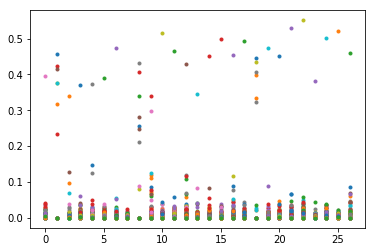

In [5]:
plt.plot(km.cluster_centers_, '.')
plt.show()

In [6]:
km.labels_

array([ 6,  7,  7, ..., 15,  7,  7], dtype=int32)

In [7]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
# print(prediction)
count = 0
for i in prediction:
    if i == 8:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 8: 5-minute breakfast options to start your day right:

Cluster 8: Start your day off right with one of these quick breakfasts:

Cluster 8: Got 5 minutes? Then start your day off right with one of these quick breakfasts:

Cluster 8: 5-minute breakfast options to start your day right:

Cluster 8: 5-minute breakfast options to start your day right:



In [8]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
    score.append(kmeans[i].fit(dataset).score(dataset))

Fitting kmeans with 1 clusters
Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters
Fitting kmeans with 20 clusters
Fitting kmeans with 21 clusters
Fitting kmeans with 22 clusters
Fitting kmeans with 23 clusters
Fitting kmeans with 24 clusters
Fitting kmeans with 25 clusters
Fitting kmeans with 26 clusters
Fitting kmeans with 27 clusters
Fitting kmeans with 28 clusters
Fitting kmeans with 29 clusters


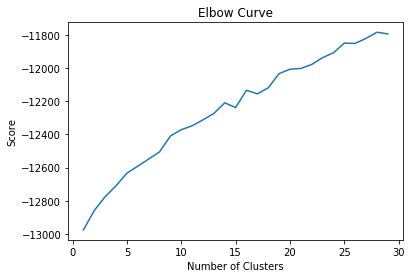

In [9]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [10]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Aqui tentei usar o txt para fazer o k-means, mas não terminei

In [11]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

13229

In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(health_lines)
# X = vectorizer.transform(health_lines)

In [17]:
type(X)

scipy.sparse.csr.csr_matrix

In [18]:
print(X)

  (0, 7237)	1
  (0, 1826)	1
  (0, 4628)	1
  (0, 7249)	1
  (0, 6167)	1
  (0, 11911)	1
  (0, 5332)	1
  (0, 11412)	2
  (0, 11198)	1
  (0, 5526)	1
  (0, 7526)	1
  (0, 401)	1
  (1, 1786)	1
  (1, 2345)	1
  (1, 8314)	1
  (1, 5967)	1
  (1, 6683)	1
  (1, 4216)	1
  (1, 5473)	1
  (1, 3144)	1
  (1, 1129)	1
  (1, 8063)	1
  (2, 9100)	1
  (2, 7892)	1
  (2, 1292)	1
  :	:
  (13223, 9518)	1
  (13223, 10837)	1
  (13223, 2904)	1
  (13223, 11518)	1
  (13224, 8714)	1
  (13224, 7635)	1
  (13224, 1464)	1
  (13224, 1055)	1
  (13225, 5356)	1
  (13225, 11140)	1
  (13225, 1464)	1
  (13225, 7471)	1
  (13226, 5438)	1
  (13226, 3995)	1
  (13226, 5234)	1
  (13226, 6542)	1
  (13227, 7305)	1
  (13227, 8098)	1
  (13227, 10643)	1
  (13227, 7279)	1
  (13227, 7826)	1
  (13228, 6588)	1
  (13228, 3153)	1
  (13228, 5565)	1
  (13228, 1740)	1


In [19]:
vectorizer.vocabulary_

{'abundance': 401,
 'online': 7526,
 'info': 5526,
 'turn': 11198,
 'us': 11412,
 'hypochondriacs': 5332,
 'worse': 11911,
 'lead': 6167,
 'neglect': 7249,
 'getting': 4628,
 'care': 1826,
 'need': 7237,
 'plant': 8063,
 'based': 1129,
 'diet': 3144,
 'incorporates': 5473,
 'fish': 4216,
 'may': 6683,
 'key': 5967,
 'preventing': 8314,
 'colorectal': 2345,
 'cancers': 1786,
 'take': 10608,
 'much': 7107,
 'damage': 2836,
 'hearing': 5026,
 'sports': 10074,
 'bar': 1112,
 'nightclub': 7322,
 'billion': 1292,
 'people': 7892,
 'risk': 9100,
 'rt': 9192,
 'cnn': 2248,
 'forever': 4374,
 'young': 11998,
 'discover': 3207,
 'island': 5711,
 'secrets': 9452,
 'longevity': 6417,
 'thewonderlist': 10810,
 'billweircnn': 1295,
 'post': 8188,
 'traumatic': 11068,
 'stress': 10295,
 'disorder': 3238,
 'genes': 4593,
 'simple': 9724,
 'blood': 1385,
 'test': 10745,
 'one': 7523,
 'day': 2885,
 'help': 5076,
 'tell': 10709,
 'maysoon': 6689,
 'zayid': 12025,
 'touring': 10992,
 'standup': 10149,
 '

In [20]:
N = 6
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=1000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(X)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.8766207695007324s


In [ ]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
    score.append(kmeans[i].fit(X).score(X))

In [ ]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [ ]:
print(km.predict(X[10:20]))